# Sect 37: Intro to Time Series

- online-ds-ft-070620
- 10/15/20

## Learning Objectives:

- Learn how to load in timeseries data into pandas
- Learn how to plot timeseries in pandas
- Learn how to resample at different time frequencies
- Learn about types of time series trends and how to remove them.
- Learn about seasonal decomposition

- Prepare a time series dataset to use for modeling next class

## Questions?

# Intro to Time Series

## References

- [Pandas Timeseries Documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)
- ['Timeseries Offset Aliases'](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)
- [Anchored Offsets](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets)


- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

## Working with Time Series

In [1]:
# !pip install -U fsds 
from fsds.imports import *

import warnings
warnings.filterwarnings('ignore')

## Setting figures to timeseries-friendly
mpl.rcParams['figure.figsize'] = (12,6)

import os,sys

fsds v0.2.26 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [2]:
sns.__version__

'0.11.0'

### Creating a Time Series from a DataFrame

In [3]:
df = pd.read_csv('baltimore_crime_2020.csv',low_memory=False,
                usecols=range(12))
#df = fs.datasets.load_ts_baltimore_crime_full(read_csv_kwds={
#     'low_memory':False,'usecols':list(range(12)) })
df

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude
0,04/25/2020,17:30:00,5A,2400 SHIRLEY AVE,BURGLARY,I,NaN,533.0,NORTHERN,GREENSPRING,-76.657102,39.336238
1,04/25/2020,02:40:00,5A,2900 MOUNT HOLLY ST,BURGLARY,I,NaN,624.0,NORTHWEST,WINDSOR HILLS,-76.682845,39.319594
2,04/25/2020,09:30:00,5C,0 N JANNEY ST,BURGLARY,I,NaN,232.0,SOUTHEAST,KRESSON,-76.560665,39.293067
3,04/25/2020,02:30:00,4E,900 W SARATOGA ST,COMMON ASSAULT,NaN,NaN,712.0,WESTERN,POPPLETON,-76.632368,39.292449
4,04/25/2020,15:30:00,6C,3700 BOSTON ST,LARCENY,I,NaN,231.0,SOUTHEAST,CANTON INDUSTRIAL AREA,-76.565150,39.277050
...,...,...,...,...,...,...,...,...,...,...,...,...
300331,01/01/1978,10:30:00,2A,1900 ARGONNE DR,RAPE,I,OTHER,421.0,NORTHEAST,MORGAN STATE UNIVERS,-76.582056,39.340492
300332,05/01/1977,00:01:00,2A,600 W 34TH ST,RAPE,I,OTHER,531.0,NORTHERN,WYMAN PARK,-76.626880,39.328817
300333,06/01/1975,00:00:00,2A,4400 OLD FREDERICK RD,RAPE,I,OTHER,822.0,SOUTHWEST,UPLANDS,-76.691297,39.289582
300334,07/20/1969,21:00:00,2A,5400 ROLAND AVE,RAPE,NaN,OTHER,534.0,NORTHERN,ROLAND PARK,-76.635300,39.358898


## Preparing Data for Time Series Visualization

- Index must be a `datetimeindex`

In [4]:
df.index

RangeIndex(start=0, stop=300336, step=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300336 entries, 0 to 300335
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   CrimeDate       300336 non-null  object 
 1   CrimeTime       300311 non-null  object 
 2   CrimeCode       300336 non-null  object 
 3   Location        298968 non-null  object 
 4   Description     300336 non-null  object 
 5   Inside/Outside  264873 non-null  object 
 6   Weapon          63400 non-null   object 
 7   Post            297922 non-null  object 
 8   District        300336 non-null  object 
 9   Neighborhood    289774 non-null  object 
 10  Longitude       298658 non-null  float64
 11  Latitude        298658 non-null  float64
dtypes: float64(2), object(10)
memory usage: 27.5+ MB


> #### Queston: We need to make a datetime index from the CrimeDate and CrimeTime. How might we do that?

In [6]:
# Make datetime variable from two columns
datetimeindex = pd.to_datetime(df['CrimeDate']+ ' - ' +df['CrimeTime'])
datetimeindex


0        2020-04-25 17:30:00
1        2020-04-25 02:40:00
2        2020-04-25 09:30:00
3        2020-04-25 02:30:00
4        2020-04-25 15:30:00
                 ...        
300331   1978-01-01 10:30:00
300332   1977-05-01 00:01:00
300333   1975-06-01 00:00:00
300334   1969-07-20 21:00:00
300335   1963-10-30 00:00:00
Length: 300336, dtype: datetime64[ns]

In [7]:
## Set dataframe index to be time series
df.index = datetimeindex
df

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude
2020-04-25 17:30:00,04/25/2020,17:30:00,5A,2400 SHIRLEY AVE,BURGLARY,I,NaN,533.0,NORTHERN,GREENSPRING,-76.657102,39.336238
2020-04-25 02:40:00,04/25/2020,02:40:00,5A,2900 MOUNT HOLLY ST,BURGLARY,I,NaN,624.0,NORTHWEST,WINDSOR HILLS,-76.682845,39.319594
2020-04-25 09:30:00,04/25/2020,09:30:00,5C,0 N JANNEY ST,BURGLARY,I,NaN,232.0,SOUTHEAST,KRESSON,-76.560665,39.293067
2020-04-25 02:30:00,04/25/2020,02:30:00,4E,900 W SARATOGA ST,COMMON ASSAULT,NaN,NaN,712.0,WESTERN,POPPLETON,-76.632368,39.292449
2020-04-25 15:30:00,04/25/2020,15:30:00,6C,3700 BOSTON ST,LARCENY,I,NaN,231.0,SOUTHEAST,CANTON INDUSTRIAL AREA,-76.565150,39.277050
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-01-01 10:30:00,01/01/1978,10:30:00,2A,1900 ARGONNE DR,RAPE,I,OTHER,421.0,NORTHEAST,MORGAN STATE UNIVERS,-76.582056,39.340492
1977-05-01 00:01:00,05/01/1977,00:01:00,2A,600 W 34TH ST,RAPE,I,OTHER,531.0,NORTHERN,WYMAN PARK,-76.626880,39.328817
1975-06-01 00:00:00,06/01/1975,00:00:00,2A,4400 OLD FREDERICK RD,RAPE,I,OTHER,822.0,SOUTHWEST,UPLANDS,-76.691297,39.289582
1969-07-20 21:00:00,07/20/1969,21:00:00,2A,5400 ROLAND AVE,RAPE,NaN,OTHER,534.0,NORTHERN,ROLAND PARK,-76.635300,39.358898


In [9]:
try:
    df_orig
except NameError:
    print('does not exist')

does not exist


False

In [13]:
## Save a copy of the original dataframe (IF IT DOESN"T ALREADY EXIST)
if 'df_orig' not in locals():
    print('creating df_orig')
    df_orig = df.copy()
else:
    print('df_orig already exists')
df_orig.head()

df_orig already exists


,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude
2020-04-25 17:30:00,04/25/2020,17:30:00,5A,2400 SHIRLEY AVE,BURGLARY,I,NaN,533.0,NORTHERN,GREENSPRING,-76.657102,39.336238
2020-04-25 02:40:00,04/25/2020,02:40:00,5A,2900 MOUNT HOLLY ST,BURGLARY,I,NaN,624.0,NORTHWEST,WINDSOR HILLS,-76.682845,39.319594
2020-04-25 09:30:00,04/25/2020,09:30:00,5C,0 N JANNEY ST,BURGLARY,I,NaN,232.0,SOUTHEAST,KRESSON,-76.560665,39.293067
2020-04-25 02:30:00,04/25/2020,02:30:00,4E,900 W SARATOGA ST,COMMON ASSAULT,NaN,NaN,712.0,WESTERN,POPPLETON,-76.632368,39.292449
2020-04-25 15:30:00,04/25/2020,15:30:00,6C,3700 BOSTON ST,LARCENY,I,NaN,231.0,SOUTHEAST,CANTON INDUSTRIAL AREA,-76.565150,39.277050


In [14]:
# ## Identify columns to drop/keep
keep_cols = ['Description','Longitude','Latitude','District','Neighborhood']

##  Remake df from df_org using keep_cols
df = df_orig[keep_cols].copy()
df

,Description,Longitude,Latitude,District,Neighborhood
2020-04-25 17:30:00,BURGLARY,-76.657102,39.336238,NORTHERN,GREENSPRING
2020-04-25 02:40:00,BURGLARY,-76.682845,39.319594,NORTHWEST,WINDSOR HILLS
2020-04-25 09:30:00,BURGLARY,-76.560665,39.293067,SOUTHEAST,KRESSON
2020-04-25 02:30:00,COMMON ASSAULT,-76.632368,39.292449,WESTERN,POPPLETON
2020-04-25 15:30:00,LARCENY,-76.565150,39.277050,SOUTHEAST,CANTON INDUSTRIAL AREA
...,...,...,...,...,...
1978-01-01 10:30:00,RAPE,-76.582056,39.340492,NORTHEAST,MORGAN STATE UNIVERS
1977-05-01 00:01:00,RAPE,-76.626880,39.328817,NORTHERN,WYMAN PARK
1975-06-01 00:00:00,RAPE,-76.691297,39.289582,SOUTHWEST,UPLANDS
1969-07-20 21:00:00,RAPE,-76.635300,39.358898,NORTHERN,ROLAND PARK


In [18]:
## Inspect the value_counts for the different types of crimes
val_counts = df['Description'].value_counts(1).to_frame()
# display with an inline-barplot inside your df
val_counts.style.bar()

,Description
LARCENY,0.223583
COMMON ASSAULT,0.165148
BURGLARY,0.143539
LARCENY FROM AUTO,0.132375
AGG. ASSAULT,0.108901
AUTO THEFT,0.088088
ROBBERY - STREET,0.070901
ROBBERY - COMMERCIAL,0.017687
SHOOTING,0.013282
ROBBERY - RESIDENCE,0.010388


In [21]:
## Lets get just Shootings in a new df
group_df = df.groupby('Description').get_group('SHOOTING')
group_df

,Description,Longitude,Latitude,District,Neighborhood
2020-04-25 16:09:00,SHOOTING,-76.623695,39.288378,CENTRAL,UNIVERSITY OF MARYLA
2020-04-24 15:59:00,SHOOTING,-76.584030,39.312696,EASTERN,SOUTH CLIFTON PARK
2020-04-22 22:30:00,SHOOTING,-76.674078,39.273023,SOUTHWEST,SAINT AGNES
2020-04-22 17:49:00,SHOOTING,-76.581519,39.298946,EASTERN,MILTON-MONTFORD
2020-04-22 17:55:00,SHOOTING,-76.639655,39.291300,WESTERN,FRANKLIN SQUARE
...,...,...,...,...,...
2014-01-05 16:30:00,SHOOTING,-76.688085,39.296987,SOUTHWEST,ROGNEL HEIGHTS
2014-01-05 19:41:00,SHOOTING,-76.634616,39.300554,CENTRAL,UPTON
2014-01-03 14:32:00,SHOOTING,-76.645355,39.289607,WESTERN,FRANKLIN SQUARE
2014-01-01 17:35:00,SHOOTING,-76.672260,39.350624,NORTHWEST,CENTRAL PARK HEIGHTS


In [23]:
## Make a new SHOOTING column that is an integer
crime ="SHOOTING"
group_df[crime] = (group_df['Description']=='SHOOTING').astype(int)
group_df

,Description,Longitude,Latitude,District,Neighborhood,SHOOTING
2020-04-25 16:09:00,SHOOTING,-76.623695,39.288378,CENTRAL,UNIVERSITY OF MARYLA,1
2020-04-24 15:59:00,SHOOTING,-76.584030,39.312696,EASTERN,SOUTH CLIFTON PARK,1
2020-04-22 22:30:00,SHOOTING,-76.674078,39.273023,SOUTHWEST,SAINT AGNES,1
2020-04-22 17:49:00,SHOOTING,-76.581519,39.298946,EASTERN,MILTON-MONTFORD,1
2020-04-22 17:55:00,SHOOTING,-76.639655,39.291300,WESTERN,FRANKLIN SQUARE,1
...,...,...,...,...,...,...
2014-01-05 16:30:00,SHOOTING,-76.688085,39.296987,SOUTHWEST,ROGNEL HEIGHTS,1
2014-01-05 19:41:00,SHOOTING,-76.634616,39.300554,CENTRAL,UPTON,1
2014-01-03 14:32:00,SHOOTING,-76.645355,39.289607,WESTERN,FRANKLIN SQUARE,1
2014-01-01 17:35:00,SHOOTING,-76.672260,39.350624,NORTHWEST,CENTRAL PARK HEIGHTS,1


In [19]:
## Get list of crimes to iterate through
crimes = df['Description'].unique()
crimes

array(['BURGLARY', 'COMMON ASSAULT', 'LARCENY', 'ROBBERY - STREET',
       'AUTO THEFT', 'AGG. ASSAULT', 'LARCENY FROM AUTO', 'SHOOTING',
       'ROBBERY - RESIDENCE', 'ROBBERY - COMMERCIAL', 'ARSON', 'HOMICIDE',
       'ROBBERY - CARJACKING', 'RAPE'], dtype=object)

In [24]:
## make a dict of all crime types' DataFrames 
CRIMES = {}

## For each crime type
for crime in crimes:
    ## Get the group df
    group_df = df.groupby('Description').get_group(crime)

    ## Create a new column for that crime as we did for SHOOTINGS above
    group_df[crime] = (group_df['Description']==crime).astype(int)

    ## Save the group_df into the CRIMES dict
    CRIMES[crime] = group_df
    
## Display the keys
CRIMES.keys()

dict_keys(['BURGLARY', 'COMMON ASSAULT', 'LARCENY', 'ROBBERY - STREET', 'AUTO THEFT', 'AGG. ASSAULT', 'LARCENY FROM AUTO', 'SHOOTING', 'ROBBERY - RESIDENCE', 'ROBBERY - COMMERCIAL', 'ARSON', 'HOMICIDE', 'ROBBERY - CARJACKING', 'RAPE'])

# Visualizing Time Series

In [27]:
## Check out SHOOTING key
ts = CRIMES['SHOOTING']['SHOOTING']
ts

2020-04-25 16:09:00    1
2020-04-24 15:59:00    1
2020-04-22 22:30:00    1
2020-04-22 17:49:00    1
2020-04-22 17:55:00    1
                      ..
2014-01-05 16:30:00    1
2014-01-05 19:41:00    1
2014-01-03 14:32:00    1
2014-01-01 17:35:00    1
2014-01-01 22:31:00    1
Name: SHOOTING, Length: 3989, dtype: int64

<AxesSubplot:>

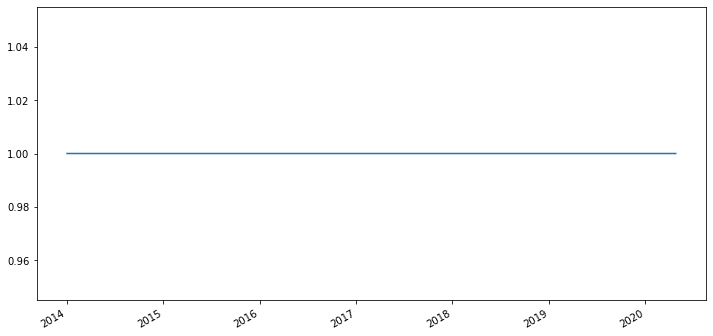

In [28]:
## Plot shooting
ts.plot()

> #### Q: What went wrong? What are we looking at?

## Resampling Time Series

<AxesSubplot:>

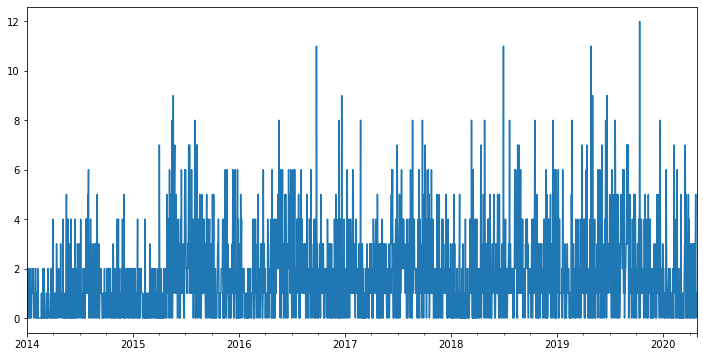

In [31]:
## Resample to daily data
ts= ts.resample("D").sum()
ts.plot()

### Time series Frequencies


#### Pandas Frequency Aliases

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases


|Alias	| Description|
| --- | --- |
|B |	business day frequency|
|C |	custom business day frequency|
|D |	calendar day frequency|
|W |	weekly frequency|
|M |	month end frequency|
|SM |	semi-month end frequency (15th and end of month)|
|BM |	business month end frequency|
|CBM |	custom business month end frequency|
|MS |	month start frequency|
|SMS |	semi-month start frequency (1st and 15th)|
|BMS |	business month start frequency|
|CBMS |	custom business month start frequency|
|Q |	quarter end frequency|
|BQ |	business quarter end frequency|
|QS |	quarter start frequency|
|BQS |	business quarter start frequency|
|A, Y |	year end frequency|
|BA, BY |	business year end frequency|
|AS, YS |	year start frequency|
|BAS, BYS |	business year start frequency|
|BH | business hour frequency|
|H | hourly frequency|
|T |  min	minutely frequency|
|S | secondly frequency|
|L |  ms	milliseconds|
|U |  us	microseconds|
|N | nanoseconds|

#### Compare Resampled ts

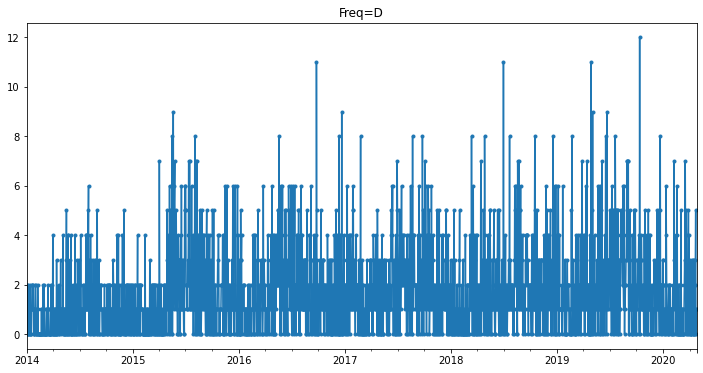

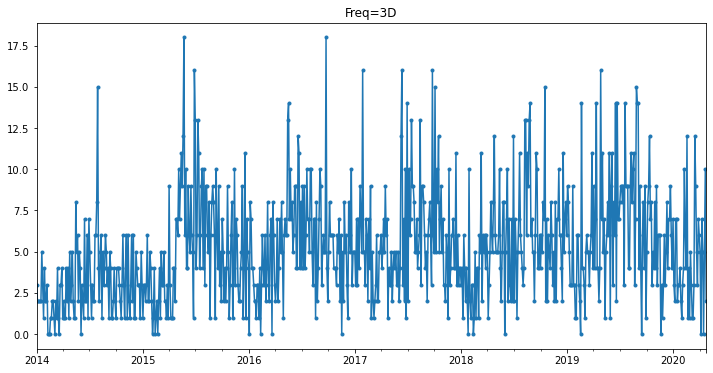

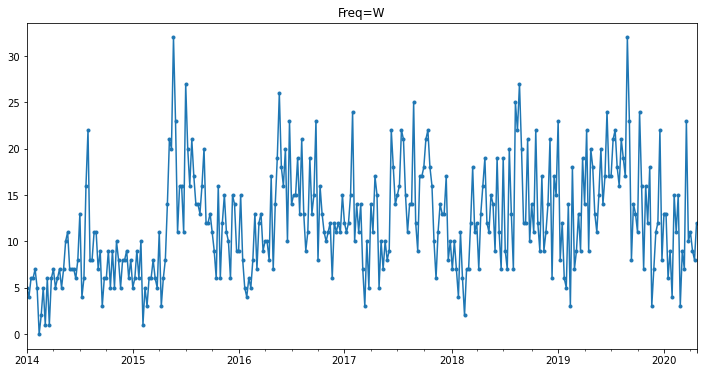

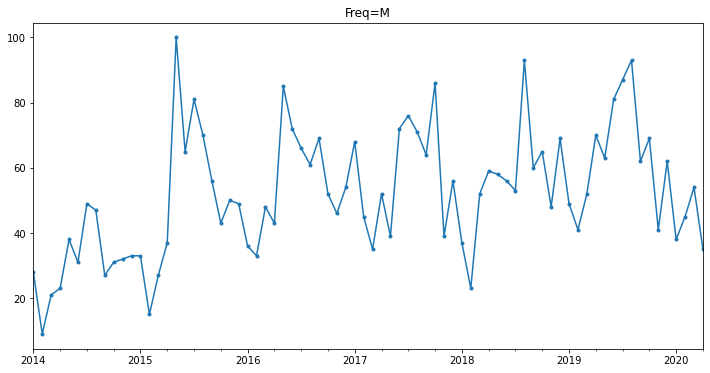

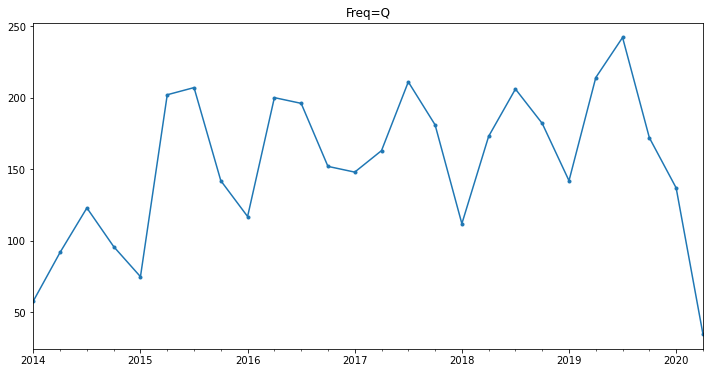

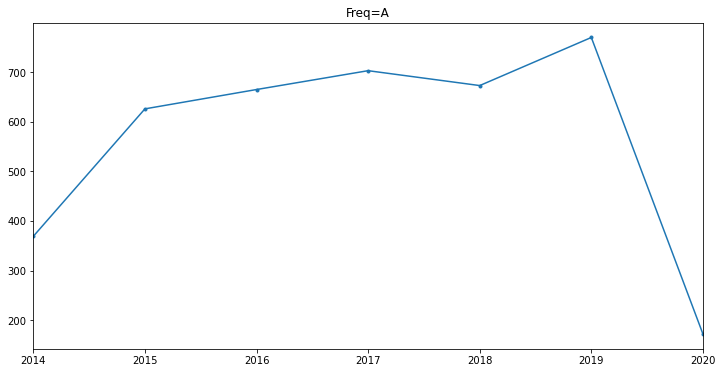

In [35]:
## Plot the same ts as different frequencies
## Specify freq codes
freq_codes = ['D','3D','W','M','Q','A']

## select ts from CRIMES
ts = CRIMES['SHOOTING']['SHOOTING']

## For each freq code, resample and plot
for freq in freq_codes:
    
    fig,ax = plt.subplots()
    ts.resample(freq).sum().plot(marker='.',title=f"Freq={freq}")


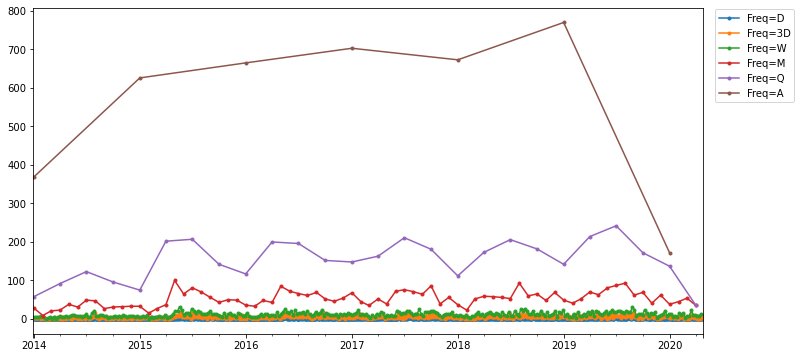

In [39]:
## Repeat the above loop,but plot it all on one figure
## Specify freq codes
freq_codes = ['D','3D','W','M','Q','A']

## select ts from CRIMES
ts = CRIMES['SHOOTING']['SHOOTING']
fig,ax = plt.subplots()

## For each freq code, resample and plot
for freq in freq_codes:
    
    ts.resample(freq).sum().plot(marker='.',label=f"Freq={freq}",ax=ax)
ax.legend(bbox_to_anchor=[1.01,1.01],loc='upper left')

## Visualize all CRIMES as "D" Freq

> **Loop through CRIMES and resample and plot all crimes**

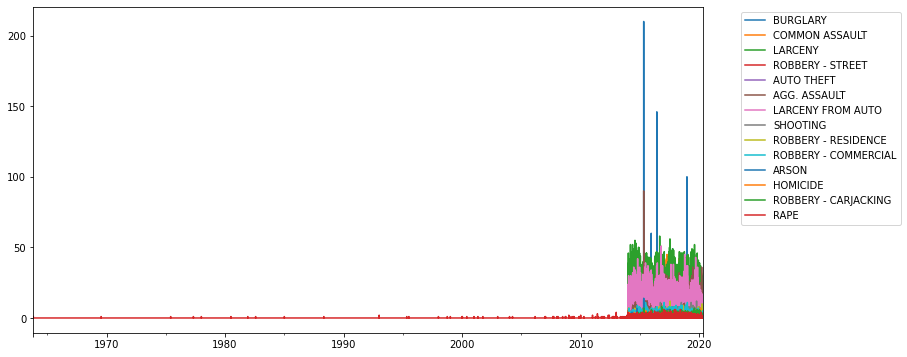

In [40]:
## Plot all crimes the same way
fig, ax = plt.subplots()
for crime,ts in CRIMES.items():
    
    ts[crime].resample('D').sum().plot(label=crime)
    
ax.legend(bbox_to_anchor=[1.05,1.0])

## Slicing With Time Series

- Make sure you're index is sorted first'
- Feed in 2 dates as strings for slicing.
- Always use .loc when slicing dates

In [44]:
## Slice 2014:
ts = CRIMES['SHOOTING']['SHOOTING'].resample('D').sum()
ts


2014-01-01    2
2014-01-02    0
2014-01-03    1
2014-01-04    0
2014-01-05    2
             ..
2020-04-21    3
2020-04-22    5
2020-04-23    0
2020-04-24    1
2020-04-25    1
Name: SHOOTING, Length: 2307, dtype: int64

In [46]:
ts.loc["2014":]

2014-01-01    2
2014-01-02    0
2014-01-03    1
2014-01-04    0
2014-01-05    2
             ..
2020-04-21    3
2020-04-22    5
2020-04-23    0
2020-04-24    1
2020-04-25    1
Name: SHOOTING, Length: 2307, dtype: int64

### Using Dictionaries for TIme Series preprocessing

In [55]:
## Save all crimes from 2014 on with freq=D in new TS dict
TS= {}
## For each crime
for crime,ts in CRIMES.items():
    
    ## Resample and slice and save ts
    TS[crime] = ts.sort_index().loc['2014':,crime].resample('D').sum()
TS.keys()

dict_keys(['BURGLARY', 'COMMON ASSAULT', 'LARCENY', 'ROBBERY - STREET', 'AUTO THEFT', 'AGG. ASSAULT', 'LARCENY FROM AUTO', 'SHOOTING', 'ROBBERY - RESIDENCE', 'ROBBERY - COMMERCIAL', 'ARSON', 'HOMICIDE', 'ROBBERY - CARJACKING', 'RAPE'])

In [56]:
## Check shooting
TS['SHOOTING']


2014-01-01    2
2014-01-02    0
2014-01-03    1
2014-01-04    0
2014-01-05    2
             ..
2020-04-21    3
2020-04-22    5
2020-04-23    0
2020-04-24    1
2020-04-25    1
Freq: D, Name: SHOOTING, Length: 2307, dtype: int64

### Visualize all ts with the differnet requency codes

In [57]:
# ## Plot the same ts as different frequencies
# freq_codes = ['D','3D','W','M','Q']

# for freq in freq_codes:
#     fig, ax = plt.subplots()

#     for crime,ts in TS.items():
#         ts.loc['2015':'2019'].resample(freq).sum().plot(title=f"Freq Code = {freq}",ax=ax)
        
#     ax.legend(bbox_to_anchor=(1.05,1),loc='upper left')

### Save Final TS and `ts_df`

In [71]:
# ## SAVE FINAL CHOICES FOR YEAR AND FREQUENCY TO TS 
# TS = {}

# ## Fill in each crimes's processed time series 
# for crime,ts in CRIMES.items():
    
#     ## Slice out years and resample and sum 
#     TS[crime] = ts.sort_index().loc['2014':][crime].resample('D').sum()
    
## Make TS into a df
ts_df = pd.concat(TS,axis=1)
ts_df.head()

,BURGLARY,COMMON ASSAULT,LARCENY,ROBBERY - STREET,AUTO THEFT,AGG. ASSAULT,LARCENY FROM AUTO,SHOOTING,ROBBERY - RESIDENCE,ROBBERY - COMMERCIAL,ARSON,HOMICIDE,ROBBERY - CARJACKING,RAPE
2014-01-01,20,19,34,8,9,22,15,2,1,2,NaN,2.0,NaN,4.0
2014-01-02,28,23,26,4,7,6,10,0,1,1,NaN,3.0,1.0,0.0
2014-01-03,13,17,16,2,3,11,6,1,1,1,NaN,1.0,0.0,0.0
2014-01-04,20,23,23,7,14,14,15,0,1,1,NaN,0.0,0.0,0.0
2014-01-05,14,22,19,10,11,9,13,2,1,0,NaN,0.0,2.0,1.0


In [72]:
TS['BURGLARY']

2014-01-01    20
2014-01-02    28
2014-01-03    13
2014-01-04    20
2014-01-05    14
              ..
2020-04-21    12
2020-04-22     7
2020-04-23     8
2020-04-24    13
2020-04-25    16
Freq: D, Name: BURGLARY, Length: 2307, dtype: int64

In [73]:
## Check For Null Values
ts_df.isna().sum()

BURGLARY                0
COMMON ASSAULT          0
LARCENY                 0
ROBBERY - STREET        0
AUTO THEFT              0
AGG. ASSAULT            0
LARCENY FROM AUTO       0
SHOOTING                0
ROBBERY - RESIDENCE     0
ROBBERY - COMMERCIAL    0
ARSON                   6
HOMICIDE                2
ROBBERY - CARJACKING    4
RAPE                    6
dtype: int64

In [74]:
## Show rows with null values
ts_df[ts_df.isna().sum(axis=1) > 0]

,BURGLARY,COMMON ASSAULT,LARCENY,ROBBERY - STREET,AUTO THEFT,AGG. ASSAULT,LARCENY FROM AUTO,SHOOTING,ROBBERY - RESIDENCE,ROBBERY - COMMERCIAL,ARSON,HOMICIDE,ROBBERY - CARJACKING,RAPE
2014-01-01,20,19,34,8,9,22,15,2,1,2,NaN,2.0,NaN,4.0
2014-01-02,28,23,26,4,7,6,10,0,1,1,NaN,3.0,1.0,0.0
2014-01-03,13,17,16,2,3,11,6,1,1,1,NaN,1.0,0.0,0.0
2014-01-04,20,23,23,7,14,14,15,0,1,1,NaN,0.0,0.0,0.0
2014-01-05,14,22,19,10,11,9,13,2,1,0,NaN,0.0,2.0,1.0
2020-04-20,11,12,13,5,6,14,17,2,1,0,0.0,0.0,0.0,NaN
2020-04-21,12,6,8,5,7,11,8,3,0,1,2.0,1.0,0.0,NaN
2020-04-22,7,15,12,5,6,15,5,5,0,2,0.0,1.0,1.0,NaN
2020-04-23,8,8,13,6,4,6,7,0,2,4,0.0,1.0,NaN,NaN
2020-04-24,13,13,11,6,10,6,9,1,0,0,1.0,NaN,NaN,NaN


> More columns would benefit from ffill than bfill so we are going to ffill and then dropna to remove the few days at the beginning of 2014 without data

In [76]:
## FFill null values
ts_df.bfill(inplace=True)
ts_df.ffill(inplace=True)

## chekc for nulls
ts_df[ts_df.isna().sum(axis=1) > 0]

,BURGLARY,COMMON ASSAULT,LARCENY,ROBBERY - STREET,AUTO THEFT,AGG. ASSAULT,LARCENY FROM AUTO,SHOOTING,ROBBERY - RESIDENCE,ROBBERY - COMMERCIAL,ARSON,HOMICIDE,ROBBERY - CARJACKING,RAPE


In [70]:
## Drop remaining nulls
ts_df.dropna(inplace=True)
ts_df.isna().sum()

BURGLARY                0
COMMON ASSAULT          0
LARCENY                 0
ROBBERY - STREET        0
AUTO THEFT              0
AGG. ASSAULT            0
LARCENY FROM AUTO       0
SHOOTING                0
ROBBERY - RESIDENCE     0
ROBBERY - COMMERCIAL    0
ARSON                   0
HOMICIDE                0
ROBBERY - CARJACKING    0
RAPE                    0
dtype: int64

In [ ]:
## Final null check


In [77]:
## Save df to csv for time series modeling next class
ts_df.to_csv('baltimore_crime_2020_ts_070620ft.csv')

# Time Series Trends

<AxesSubplot:>

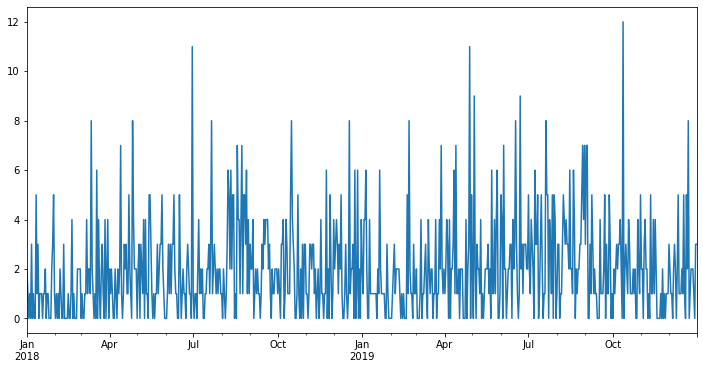

In [87]:
ts = ts_df['SHOOTING'].resample('D').sum().loc['2018':'2019']
ts.plot()

### Types of Trends

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-removing-trends-online-ds-ft-100719/master/images/new_trendseasonal.png" width=80%>

### Stationarity

<div style="text-align:center;font-size:2em">Mean</div>
    
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-types-of-trends-online-ds-ft-100719/master/images/new_mean_nonstationary.png" width=70%>
<br><br>
<div style="text-align:center;font-size:3em">Variance</div>
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-types-of-trends-online-ds-ft-100719/master/images/new_cov_nonstationary.png" width=70%>
</div>

In [91]:
## Lab Function
from statsmodels.tsa.stattools import adfuller

def stationarity_check(TS,plot=True,col=None):
    """From: https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/working-with-time-series-data/time-series-decomposition
    """
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller

    if col is not None:
        # Perform the Dickey Fuller Test
        dftest = adfuller(TS[col]) # change the passengers column as required 
    else:
        dftest=adfuller(TS)
 
    if plot:
        # Calculate rolling statistics
        rolmean = TS.rolling(window = 8, center = False).mean()
        rolstd = TS.rolling(window = 8, center = False).std()

        #Plot rolling statistics:
        fig = plt.figure(figsize=(12,6))
        orig = plt.plot(TS, color='blue',label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    dfoutput['sig'] = dfoutput['p-value']<.05
    display (dfoutput.round(3))
    
    return dfoutput
#     return dftest

In [92]:
# 

<AxesSubplot:>

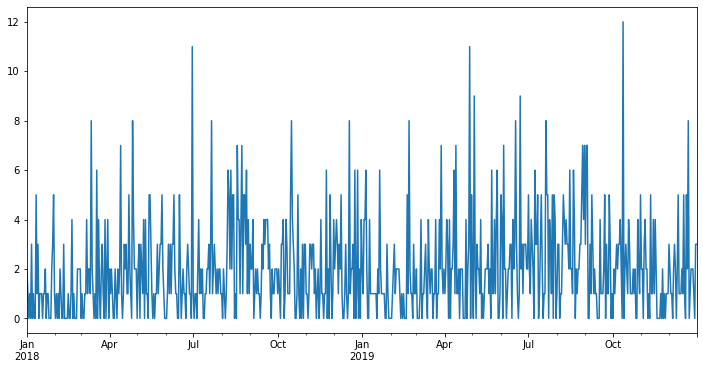

In [93]:
ts.plot()

In [100]:
# adfuller()
ts =ts.resample('D').sum()

Results of Dickey-Fuller Test:


Test Statistic                  -3.705
p-value                          0.004
#Lags Used                      20.000
Number of Observations Used    708.000
Critical Value (1%)             -3.440
Critical Value (5%)             -2.866
Critical Value (10%)            -2.569
sig                              1.000
dtype: float64

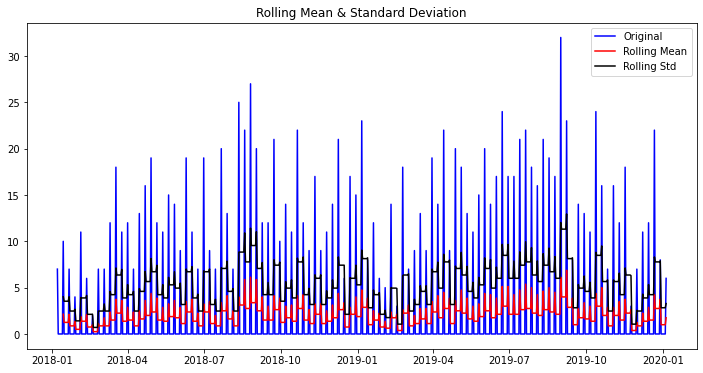

In [101]:
res = stationarity_check(ts);

# Removing Trends (cont'd next class)

- .diff()
- subtract rolling mean
- seasonal decomposition

## Seasonal Decomposition

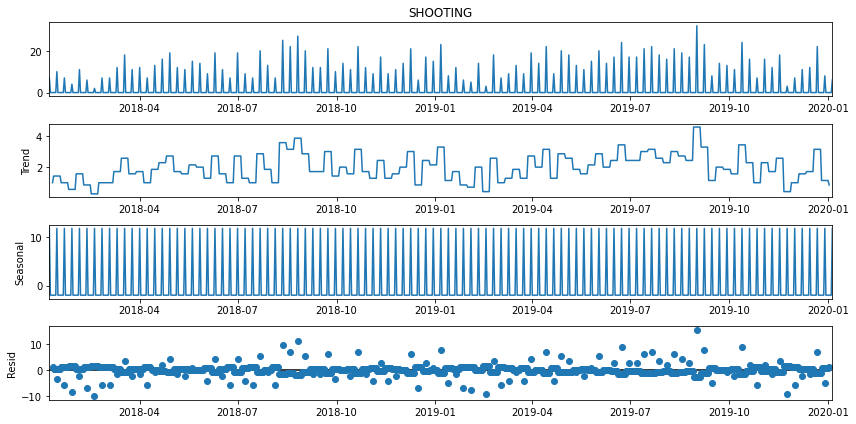

In [102]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(ts)#.plot();
decomp.plot();

In [103]:
decomp.resid

2018-01-07         NaN
2018-01-08         NaN
2018-01-09         NaN
2018-01-10    0.976799
2018-01-11    0.546854
                ...   
2020-01-01    0.833942
2020-01-02    1.118282
2020-01-03         NaN
2020-01-04         NaN
2020-01-05         NaN
Freq: D, Name: resid, Length: 729, dtype: float64

In [104]:
decomp.seasonal

2018-01-07    11.897241
2018-01-08    -1.986254
2018-01-09    -1.986254
2018-01-10    -1.976799
2018-01-11    -1.975425
                ...    
2020-01-01    -1.976799
2020-01-02    -1.975425
2020-01-03    -1.986254
2020-01-04    -1.986254
2020-01-05    11.897241
Freq: D, Name: seasonal, Length: 729, dtype: float64

Results of Dickey-Fuller Test:


Test Statistic                -1.088449e+16
p-value                        0.000000e+00
#Lags Used                     1.500000e+01
Number of Observations Used    7.130000e+02
Critical Value (1%)           -3.440000e+00
Critical Value (5%)           -2.866000e+00
Critical Value (10%)          -2.569000e+00
sig                            1.000000e+00
dtype: float64

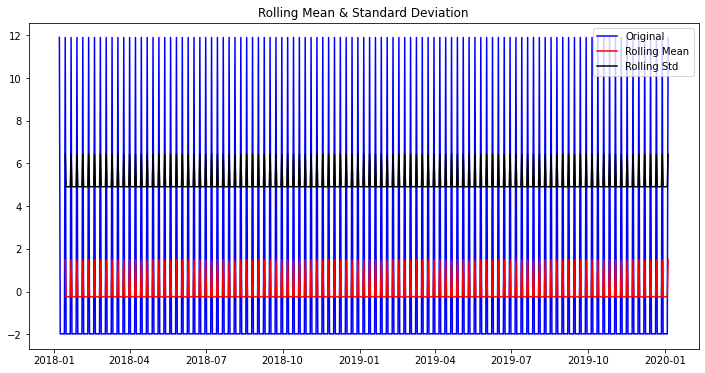

In [105]:
 stationarity_check(decomp.seasonal);

# APPENDIX

[Text(0, 0.5, '# of Crimes'), Text(0.5, 0, 'Year by Day')]

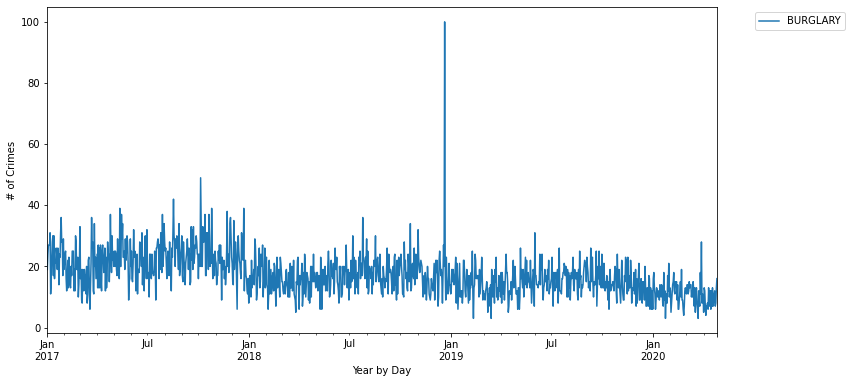

In [106]:
ax = ts_df.loc['2017':,'BURGLARY'].plot()
ax.legend(bbox_to_anchor=(1.05,1),loc='upper left')
ax.set(ylabel='# of Crimes',xlabel='Year by Day')

## Time Series Calculations


### Rolling Statistics

In [108]:
ts_df.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19',
               '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23',
               '2020-04-24', '2020-04-25'],
              dtype='datetime64[ns]', length=2307, freq='D')

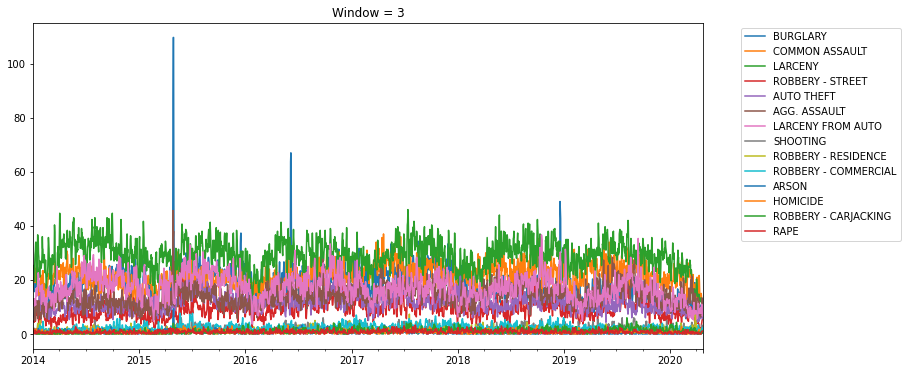

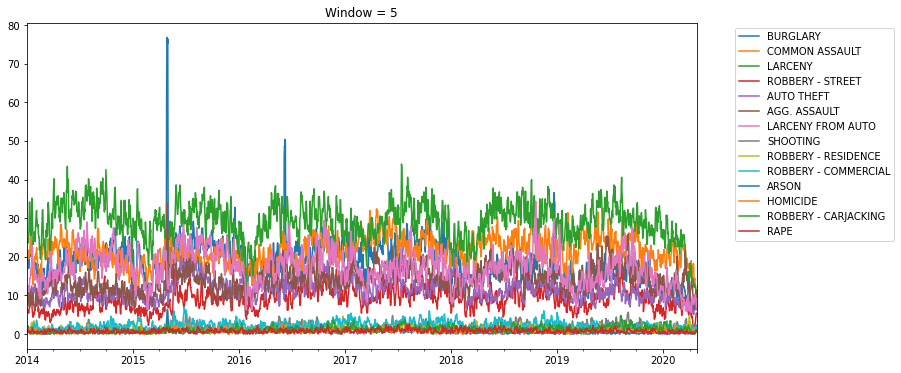

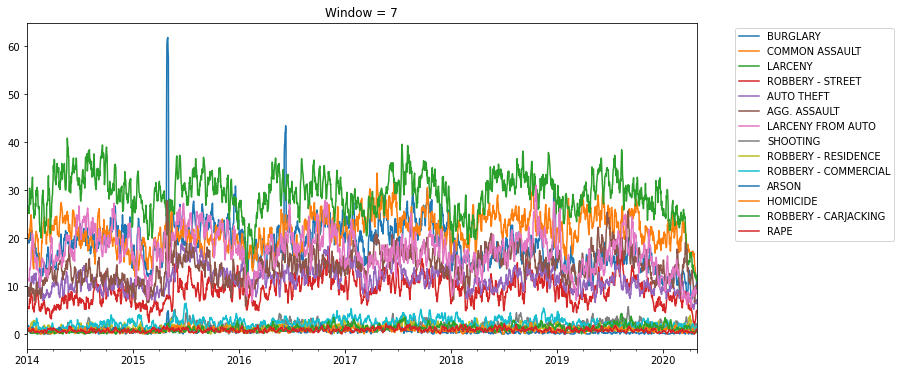

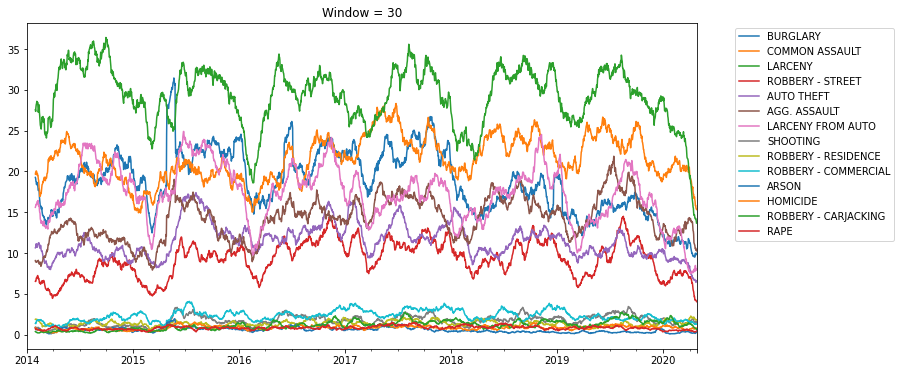

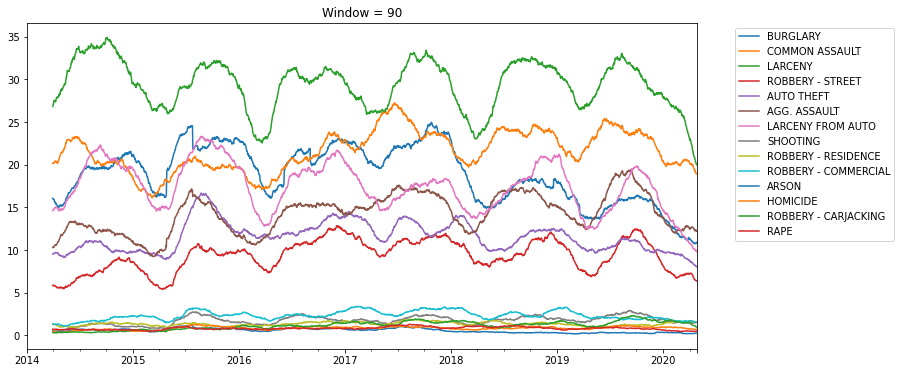

In [107]:
## Plot the same ts as different frequencies
# freq_codes = ['D','3D','W','M','Q']
windows = [3,5,7,30,90]
for window in windows:
    
    fig,ax = plt.subplots()
    ts_df.rolling(window).mean().plot(title= f"Window = {window}",ax=ax)
#     ts.rolling(window).mean().plot(title=title)
        
    ax.legend(bbox_to_anchor=(1.05,1),loc='upper left')

## Doing it all Together

In [114]:
# pd.get_dummies(df_orig,columns=['Description'])

In [111]:
df = df_orig.copy()
for crime in df['Description'].unique():
    df[crime] = (df['Description']==crime).astype(int)
df

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,...,AUTO THEFT,AGG. ASSAULT,LARCENY FROM AUTO,SHOOTING,ROBBERY - RESIDENCE,ROBBERY - COMMERCIAL,ARSON,HOMICIDE,ROBBERY - CARJACKING,RAPE
2020-04-25 17:30:00,04/25/2020,17:30:00,5A,2400 SHIRLEY AVE,BURGLARY,I,NaN,533.0,NORTHERN,GREENSPRING,...,0,0,0,0,0,0,0,0,0,0
2020-04-25 02:40:00,04/25/2020,02:40:00,5A,2900 MOUNT HOLLY ST,BURGLARY,I,NaN,624.0,NORTHWEST,WINDSOR HILLS,...,0,0,0,0,0,0,0,0,0,0
2020-04-25 09:30:00,04/25/2020,09:30:00,5C,0 N JANNEY ST,BURGLARY,I,NaN,232.0,SOUTHEAST,KRESSON,...,0,0,0,0,0,0,0,0,0,0
2020-04-25 02:30:00,04/25/2020,02:30:00,4E,900 W SARATOGA ST,COMMON ASSAULT,NaN,NaN,712.0,WESTERN,POPPLETON,...,0,0,0,0,0,0,0,0,0,0
2020-04-25 15:30:00,04/25/2020,15:30:00,6C,3700 BOSTON ST,LARCENY,I,NaN,231.0,SOUTHEAST,CANTON INDUSTRIAL AREA,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-01-01 10:30:00,01/01/1978,10:30:00,2A,1900 ARGONNE DR,RAPE,I,OTHER,421.0,NORTHEAST,MORGAN STATE UNIVERS,...,0,0,0,0,0,0,0,0,0,1
1977-05-01 00:01:00,05/01/1977,00:01:00,2A,600 W 34TH ST,RAPE,I,OTHER,531.0,NORTHERN,WYMAN PARK,...,0,0,0,0,0,0,0,0,0,1
1975-06-01 00:00:00,06/01/1975,00:00:00,2A,4400 OLD FREDERICK RD,RAPE,I,OTHER,822.0,SOUTHWEST,UPLANDS,...,0,0,0,0,0,0,0,0,0,1
1969-07-20 21:00:00,07/20/1969,21:00:00,2A,5400 ROLAND AVE,RAPE,NaN,OTHER,534.0,NORTHERN,ROLAND PARK,...,0,0,0,0,0,0,0,0,0,1


In [112]:
df.sort_index().loc['2014':].resample('D').sum()

,Longitude,Latitude,BURGLARY,COMMON ASSAULT,LARCENY,ROBBERY - STREET,AUTO THEFT,AGG. ASSAULT,LARCENY FROM AUTO,SHOOTING,ROBBERY - RESIDENCE,ROBBERY - COMMERCIAL,ARSON,HOMICIDE,ROBBERY - CARJACKING,RAPE
2014-01-01,-10420.028394,5345.269744,20,19,34,8,9,22,15,2,1,2,0,2,0,4
2014-01-02,-8427.891782,4324.255260,28,23,26,4,7,6,10,0,1,1,0,3,1,0
2014-01-03,-5440.490385,2791.332077,13,17,16,2,3,11,6,1,1,1,0,1,0,0
2014-01-04,-9040.397923,4637.819594,20,23,23,7,14,14,15,0,1,1,0,0,0,0
2014-01-05,-7891.854189,4048.187238,14,22,19,10,11,9,13,2,1,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-21,-4904.168259,2515.696947,12,6,8,5,7,11,8,3,0,1,2,1,0,0
2020-04-22,-5670.095842,2908.746434,7,15,12,5,6,15,5,5,0,2,0,1,1,0
2020-04-23,-4520.988541,2319.411577,8,8,13,6,4,6,7,0,2,4,0,1,0,0
2020-04-24,-5363.158611,2751.034686,13,13,11,6,10,6,9,1,0,0,1,0,0,0


## Older cont


In [ ]:
ts = TS['HOMICIDE']
ts

In [ ]:
ts = ts.resample('W').sum()
ts

In [ ]:
ts_mean = ts.rolling(window=2).sum()
ax = ts.plot(label='Time Series')
ts_mean.plot(label='Rolling 7-Day Average')
ax.legend()

In [ ]:
## fill in null values
# ts.plot()
ts.ewm(halflife=2).mean()#sum()#.plot()

In [ ]:
## Use adfull to test for stationarity
ts.plot()

## Rolling Windows 

In [ ]:
ts_df.rolling(1).mean()

In [ ]:
# ts_df.rolling(7).mean().plot()

## Using Datetime objects and apply statemements

In [ ]:
df_ = CRIMES['HOMICIDE'].reset_index().dropna()
display(df_.head())
df_.dtypes

In [ ]:
df_['index'][0]

In [ ]:
df_['index'].dt.year#.strftime('%y')

In [ ]:
df_.isna().sum()

In [ ]:
df_['index'].dt.year

In [ ]:
df_['index'].map(lambda x: x.strftime('%Y'))

In [ ]:
test = df_.loc[0,'index']
test

In [ ]:
test.strftime('%y')

### Date Str Formatting




Formatting follows the Python datetime <strong><a href='http://strftime.org/'>strftime</a></strong> codes.<br>
The following examples are based on <tt>datetime.datetime(2001, 2, 3, 16, 5, 6)</tt>:
<br><br>

<table style="display: inline-block">  
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%Y</td><td>Year with century as a decimal number.</td><td>2001</td></tr>
<tr><td>%y</td><td>Year without century as a zero-padded decimal number.</td><td>01</td></tr>
<tr><td>%m</td><td>Month as a zero-padded decimal number.</td><td>02</td></tr>
<tr><td>%B</td><td>Month as locale’s full name.</td><td>February</td></tr>
<tr><td>%b</td><td>Month as locale’s abbreviated name.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Day of the month as a zero-padded decimal number.</td><td>03</td></tr>  
<tr><td>%A</td><td>Weekday as locale’s full name.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Weekday as locale’s abbreviated name.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hour (24-hour clock) as a zero-padded decimal number.</td><td>16</td></tr>
<tr><td>%I</td><td>Hour (12-hour clock) as a zero-padded decimal number.</td><td>04</td></tr>
<tr><td>%p</td><td>Locale’s equivalent of either AM or PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minute as a zero-padded decimal number.</td><td>05</td></tr>
<tr><td>%S</td><td>Second as a zero-padded decimal number.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%#m</td><td>Month as a decimal number. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Month as a decimal number. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Long date</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Long date and time</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>  
    

In [ ]:
test = ts.index[0]
print(test)
test


In [ ]:
print(test.strftime("%m-%d-%Y"))
print(test.strftime("%T"))

In [ ]:
TS['SHOOTING']

## A: Groupby Indexing

In [ ]:
ts.groupby(pd.Grouper(freq='M')).sum().plot(subplots=True)